In [43]:
import torch
from torch.autograd import Variable
from table_generator.lib.io import load_point_clouds, write_point_cloud
from table_generator.lib.auto_encoder import Encoder, Decoder, AutoEncoder
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [35]:
encoder = Encoder()
encoder.load_state_dict(torch.load('./table_generator/models/encoder.pt', map_location={'cuda:0': 'cpu'}))

In [36]:
index_list = range(500)
point_clouds = load_point_clouds(index_list, directory='./table_generator/data/04379243')

In [37]:
latent_vector = encoder(point_clouds).detach().numpy()
latent_vector = latent_vector.reshape(-1, 32)

latent_vector.shape

(500, 32)

In [38]:
latent_vector_2d = TSNE(n_components=2, random_state=0).fit_transform(latent_vector)

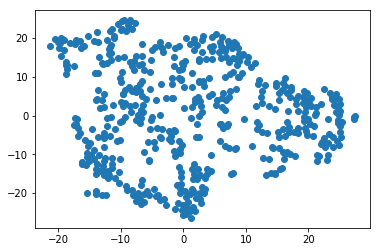

In [39]:
plt.scatter(latent_vector_2d[:, 0], latent_vector_2d[:, 1])
plt.show()

In [44]:
np.savetxt('2d_vector.csv', latent_vector_2d, delimiter=',')